# Late Shipment (or Part Shortage) Prediction

<img src="https://raw.githubusercontent.com/katonic-dev/Katonic-ML-Marketplace/master/Late%20Shipment%20(or%20Part%20Shortage)%20Prediction/lates-shipment-prediction.jpg?token=AQS2G3NQN3NJDZTFJSUK3CTBZ3VDC" style="width: 1000px;"/>

## Data Preparation

### Import Libraries

In [1]:
# Ignore Warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
# For data wrangling 
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [78]:
# Read the data frame
df = pd.read_csv('late_shipment_data.csv', delimiter=',')
df.head()

,ID,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,Late_delivery,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,Cªte d'Ivoire,PMO - US,Direct Drop,EXW,Air,0,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13.0,780.34,NaN
1,3,Vietnam,PMO - US,Direct Drop,EXW,Air,0,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358.0,4521.50,NaN
2,4,Cªte d'Ivoire,PMO - US,Direct Drop,FCA,Air,0,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171.0,1653.78,NaN
3,15,Vietnam,PMO - US,Direct Drop,EXW,Air,0,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855.0,16007.06,NaN
4,16,Vietnam,PMO - US,Direct Drop,EXW,Air,0,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590.0,45450.08,NaN


In [79]:
print(f"Shape of the Data Set: {df.shape}")

Shape of the Data Set: (10324, 25)


The Dataset has 10324 rows with 25 attributes. We review this further to identify what attributes will be necessary and what data manipulation needs to be carried out before Exploratory analysis and prediction modelling.

In [80]:
# Check columns list and missing values
df.isnull().sum()

ID                               0
Country                          0
Managed By                       0
Fulfill Via                      0
Vendor INCO Term              5404
Shipment Mode                  360
Late_delivery                    0
Product Group                    0
Sub Classification               0
Vendor                           0
Item Description                 0
Molecule/Test Type               0
Brand                            0
Dosage                        1736
Dosage Form                      0
Unit of Measure (Per Pack)       0
Line Item Quantity               0
Line Item Value                  0
Pack Price                       0
Unit Price                       0
Manufacturing Site               0
First Line Designation           0
Weight (Kilograms)            3952
Freight Cost (USD)            4126
Line Item Insurance (USD)      287
dtype: int64

In [81]:
# Get unique count for each variable
df.nunique()

ID                            10324
Country                          43
Managed By                        4
Fulfill Via                       2
Vendor INCO Term                  7
Shipment Mode                     4
Late_delivery                     2
Product Group                     5
Sub Classification                6
Vendor                           73
Item Description                184
Molecule/Test Type               86
Brand                            48
Dosage                           54
Dosage Form                      17
Unit of Measure (Per Pack)       31
Line Item Quantity             5065
Line Item Value                8741
Pack Price                     1175
Unit Price                      183
Manufacturing Site               88
First Line Designation            2
Weight (Kilograms)             3388
Freight Cost (USD)             5432
Line Item Insurance (USD)      6722
dtype: int64

From the above, we will not require the `ID`, `Vendor INCO Term`, `Dosage` attributes as they are not relevant for our analysis.

In [82]:
# Drop the columns as explained above
df = df.drop(["ID", "Vendor INCO Term", "Dosage"], axis=1)

# Handling missing values
df = df[df["Shipment Mode"].notna()]
df = df[df["Weight (Kilograms)"].notna()]
df = df[df["Freight Cost (USD)"].notna()]
df = df[df["Line Item Insurance (USD)"].notna()]

In [83]:
# Review the top rows of what is left of the data frame
df.head()

,Country,Managed By,Fulfill Via,Shipment Mode,Late_delivery,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
19,Nigeria,PMO - US,Direct Drop,Air,0,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,Test kit,100,1000,80000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,341.0,2682.47,128.00
22,Vietnam,PMO - US,Direct Drop,Air,0,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,Oral suspension,240,1000,1920.0,1.92,0.01,"Aurobindo Unit III, India",Yes,941.0,4193.49,3.07
23,Vietnam,PMO - US,Direct Drop,Air,0,ARV,Adult,ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV),"Lopinavir/Ritonavir 200/50mg [Aluvia], tablets...",Lopinavir/Ritonavir,Aluvia,Tablet,120,500,41095.0,82.19,0.68,ABBVIE Ludwigshafen Germany,Yes,117.0,1767.38,65.75
24,Haiti,PMO - US,Direct Drop,Air,1,HRDT,HIV test,"Orgenics, Ltd","HIV 1/2, Determine HIV Kit, without Lancets, 1...","HIV 1/2, Determine HIV Kit, without Lancets",Determine,Test kit,100,750,53992.5,71.99,0.72,Inverness Japan,Yes,171.0,3518.38,86.39
25,Haiti,PMO - US,Direct Drop,Air,0,HRDT,HIV test,Orasure Technologies Inc.,"HIV 1/2, OraQuick Advance HIV Rapid Antibody K...","HIV 1/2, OraQuick Advance HIV Rapid Antibody Kit",OraQuick,Test kit,100,25,8750.0,350.00,3.50,"Pacific Biotech, Thailand",Yes,60.0,3097.85,14.00


In [84]:
# Check variable data types
df.dtypes

Country                        object
Managed By                     object
Fulfill Via                    object
Shipment Mode                  object
Late_delivery                   int64
Product Group                  object
Sub Classification             object
Vendor                         object
Item Description               object
Molecule/Test Type             object
Brand                          object
Dosage Form                    object
Unit of Measure (Per Pack)      int64
Line Item Quantity              int64
Line Item Value               float64
Pack Price                    float64
Unit Price                    float64
Manufacturing Site             object
First Line Designation         object
Weight (Kilograms)            float64
Freight Cost (USD)            float64
Line Item Insurance (USD)     float64
dtype: object

## Exploratory Data Analysis

Here our main interest is to get an understanding as to how the given attributes relate to the `Late_delivery` status.

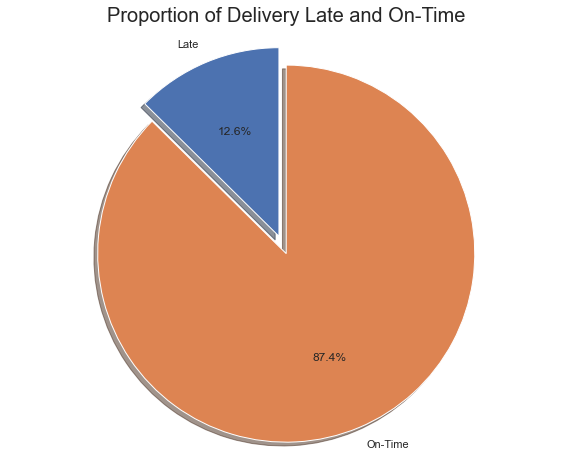

In [85]:
labels = 'Late', 'On-Time'
sizes = [df.Late_delivery[df['Late_delivery']==1].count(), df.Late_delivery[df['Late_delivery']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Delivery Late and On-Time", size = 20)
plt.show()

So about 12.6% of the deliveries are late. So the baseline model could be to predict that 13% of the delivery will late. Given 12.6~13% is a small number, we need to ensure that, the chosen model does predict with great accuracy this 13% as it is of interest to the company to identify and keep this bunch as opposed to accurately predicting the deliveries that are on-time.

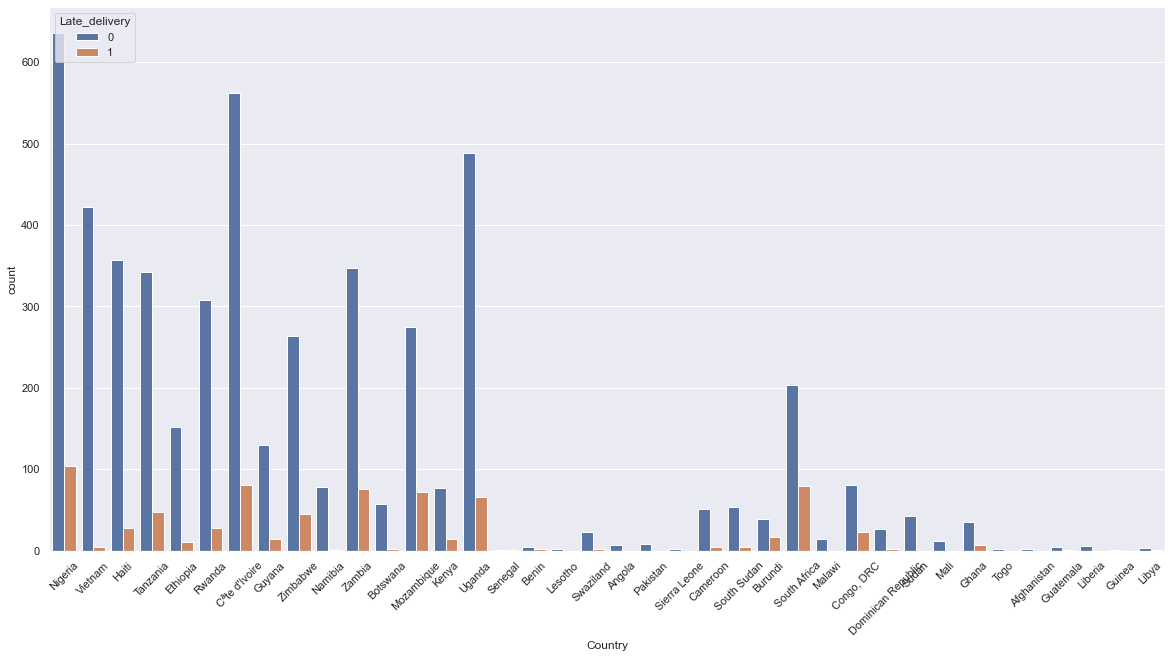

In [86]:
# We first review the 'Status' relation with categorical variables
sns.set(rc={'figure.figsize':(20,10)})
plt.xticks(rotation=45)
sns.countplot(x='Country', hue='Late_delivery', data=df);

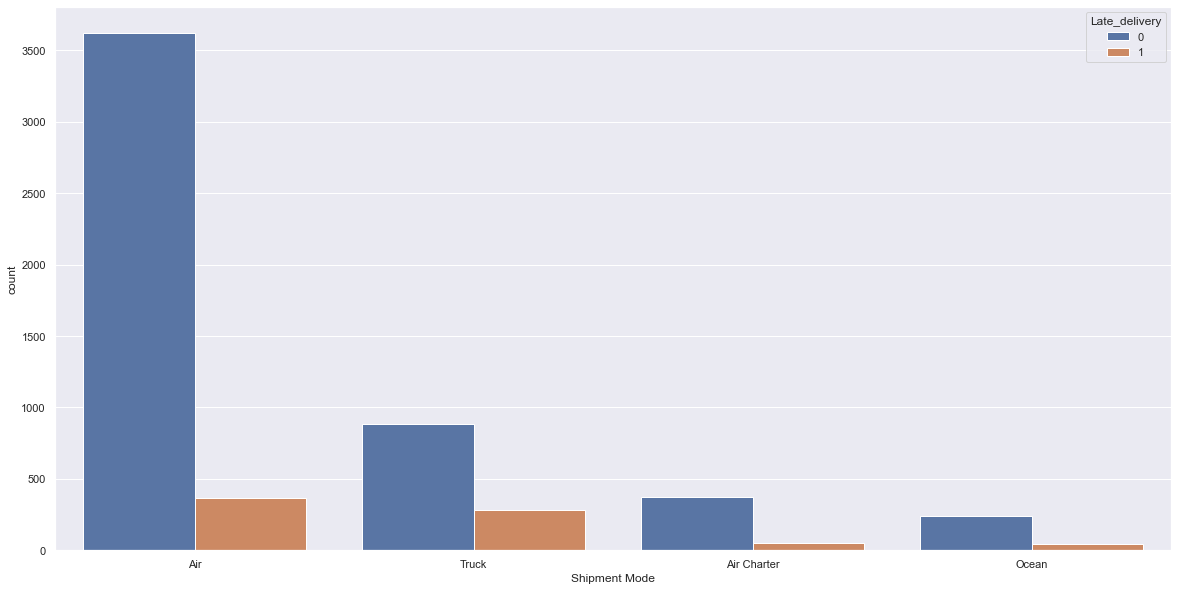

In [87]:
sns.countplot(x='Shipment Mode', hue='Late_delivery', data=df);

In [90]:
fig = px.pie(df, names='Brand', values='Late_delivery',
             title='% Late Delivery vs Brands',)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(margin=dict(t=0, b=0, l=0, r=0))
fig.show()

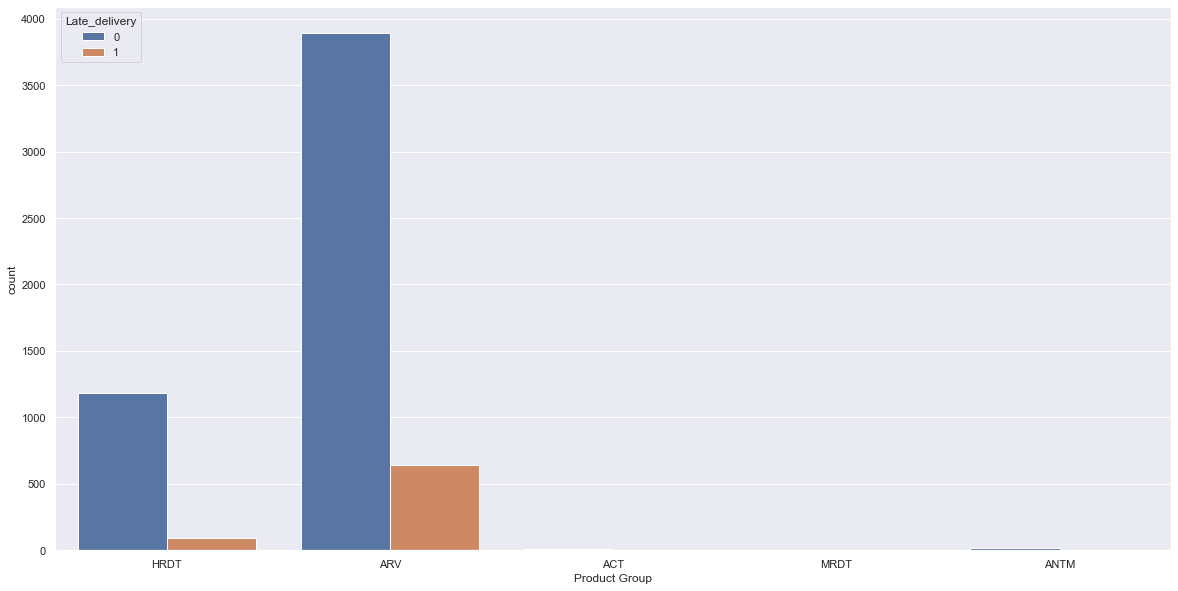

In [92]:
sns.countplot(x='Product Group', hue='Late_delivery', data=df);

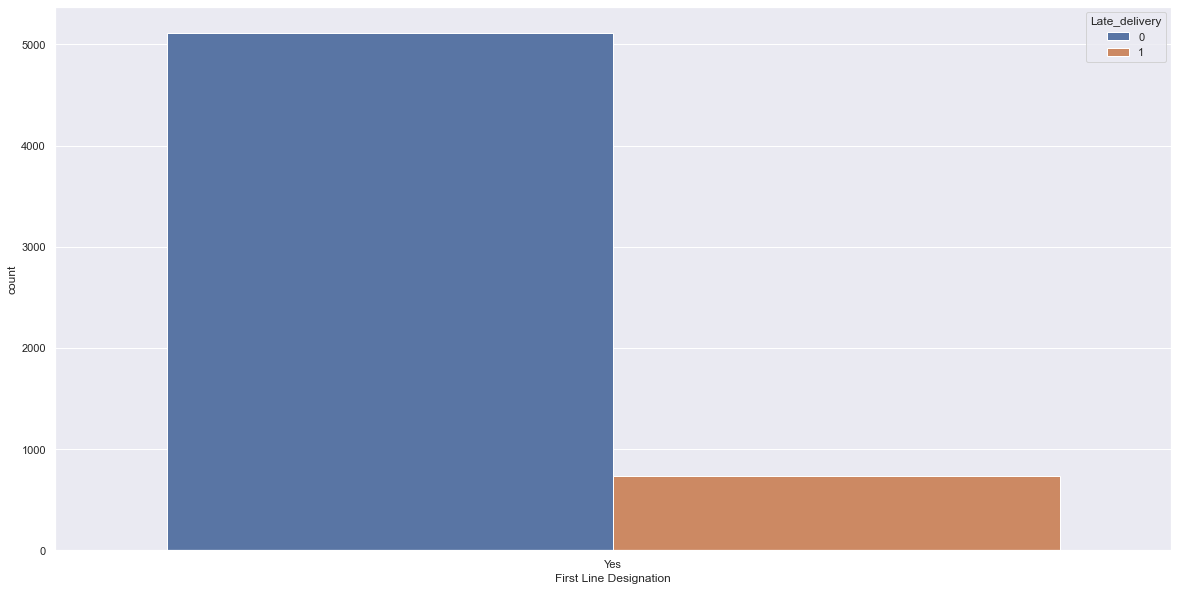

In [70]:
sns.countplot(x='First Line Designation', hue='Late_delivery', data=df);

In [93]:
X = df.drop(["Late_delivery"], axis=1)
y = df["Late_delivery"]

## Model fitting and selection

In [94]:
import evalml
from evalml.automl import AutoMLSearch
problem_type = 'binary'

X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(X, y, problem_type = problem_type, test_size=.2)

# perform a search across multiple pipelines and hyperparameters
automl = AutoMLSearch(X_train, y_train, problem_type=problem_type)
automl.search()

In [95]:
# the best pipeline is already refitted on the entire training data
best_pipeline = automl.best_pipeline
best_pipeline.predict(X_test)

4788     0
6865     1
8564     1
2270     0
6493     0
7431     0
4578     0
5169     0
6337     0
9484     1
5201     0
3094     0
8197     0
6472     0
10207    0
7173     0
3404     1
1751     1
7522     0
10256    1
237      0
6976     1
2811     0
8692     0
5686     0
4698     0
9539     0
1505     0
5796     0
174      0
1925     1
1198     0
2383     0
5451     0
469      0
8064     0
6602     0
7882     1
7922     1
4065     1
5448     1
1821     0
5903     0
7316     0
3966     0
7445     0
9996     1
6996     1
8808     1
6741     1
9003     0
1088     0
648      0
7555     1
10031    0
3550     0
3809     0
1161     1
8426     0
6619     0
10002    0
143      0
1061     0
4296     0
8169     0
559      0
1994     0
5911     0
9511     0
6394     0
9753     0
8292     0
2050     1
4648     1
9586     0
3145     0
4580     0
4862     0
5953     0
8727     0
5122     0
1810     0
2941     0
4782     0
2520     0
4094     0
8770     0
2338     0
3684     0
7740     0
4120     1

In [96]:
automl.rankings

,id,pipeline_name,search_order,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,3,XGBoost Classifier w/ Label Encoder + Imputer ...,3,0.329487,0.010558,0.336223,92.426508,False,{'Imputer': {'categorical_impute_strategy': 'm...
1,6,Random Forest Classifier w/ Label Encoder + Im...,6,0.345312,0.006152,0.350968,92.062763,False,{'Imputer': {'categorical_impute_strategy': 'm...
2,8,Extra Trees Classifier w/ Label Encoder + Impu...,8,0.350274,0.002943,0.352007,91.948694,False,{'Imputer': {'categorical_impute_strategy': 'm...
3,4,LightGBM Classifier w/ Label Encoder + Imputer...,4,0.352053,0.008684,0.355146,91.907819,False,{'Imputer': {'categorical_impute_strategy': 'm...
4,1,Elastic Net Classifier w/ Label Encoder + Impu...,1,0.353316,0.008700,0.363361,91.878773,False,{'Imputer': {'categorical_impute_strategy': 'm...
5,2,Logistic Regression Classifier w/ Label Encode...,2,0.356066,0.009346,0.366814,91.815560,False,{'Imputer': {'categorical_impute_strategy': 'm...
6,7,Decision Tree Classifier w/ Label Encoder + Im...,7,0.513806,0.081541,0.592525,88.189794,False,{'Imputer': {'categorical_impute_strategy': 'm...
7,5,CatBoost Classifier w/ Label Encoder + Imputer...,5,0.536386,0.007088,0.540208,87.670792,False,{'Imputer': {'categorical_impute_strategy': 'm...
8,0,Mode Baseline Binary Classification Pipeline,0,4.350528,0.012050,4.356043,0.000000,False,{'Baseline Classifier': {'strategy': 'mode'}}


In [97]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


*********************************************************************************
* XGBoost Classifier w/ Label Encoder + Imputer + One Hot Encoder + Oversampler *
*********************************************************************************

Problem Type: binary
Model Family: XGBoost

Pipeline Steps
1. Label Encoder
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
3. One Hot Encoder
	 * top_n : 10
	 * features_to_encode : None
	 * categories : None
	 * drop : if_binary
	 * handle_unknown : ignore
	 * handle_missing : error
4. Oversampler
	 * sampling_ratio : 0.25
	 * k_neighbors_default : 5
	 * n_jobs : -1
	 * sampling_ratio_dict : None
	 * categorical_features : [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61

In [98]:
scores = best_pipeline.score(X_test, y_test,  objectives=["auc"])
print(scores['AUC'])

0.797119140625


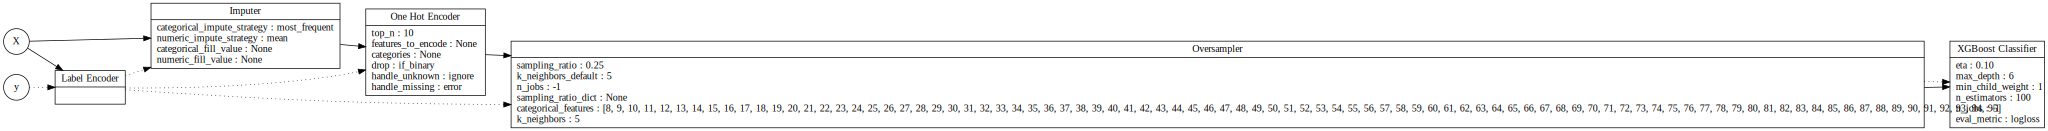

In [99]:
best_pipeline.graph()